# __Algerian Forest Fire Dataset linear regression modelling__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

# __Data cleaning operations__

In [ ]:
data.info()

Getting unique values from y data column:  
Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [ ]:
data["Classes  "].unique()

Apply `str.strip()` to clean the data:  
As we can see y data has some blank spaces so we need to remove then before use.  
I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [6]:
data["Classes  "] = data["Classes  "].str.strip()

In [ ]:
data

In [8]:
data["Classes  "].unique()

array(['not fire', 'fire'], dtype=object)

Convert data type of all data column:  
In below code I am selecting all data which are intiger and making the column data type as float64

In [ ]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

I am converting Rain from numerical to categorical data.  
Reason is While analysing the data I found that rain has 52-56% zero values.  
  
And from EDA for rain, we can see where is rain change for fire is very less, 

So I am changing this dataset from numerical to categorical data.  
  
I will put `rain` if rain > 0 else `not rain`

In [46]:
data["Rain "] = data["Rain "].apply(lambda x: 'not rain' if x == 0 else 'rain')

# __Outlier handaling__

In [53]:
# mean is affected by outlier so i am using median for replasing outliers
floate_col = data.select_dtypes([np.number]).columns

In [55]:
for i in floate_col:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    median = data[i].median()
    # data[i] = np.where(data[i]>upper,median,data[i])
    # data[i] = np.where(data[i]<lower,median,data[i])
    data[i] = data[i].apply(lambda x: median if (x < lower) | (x > upper) else x)

# __Data standardization and data imputetion for zero values__

## __data imputetion for zero values__

In [ ]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

In [59]:
for i in floate_col:
    mean = data[i].mean()
    data[i] = data[i].apply(lambda x: mean if (x == 0) else x)

In [ ]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

## __Appling Box-Cox on dataset to make is notmalize__  

In [61]:
from scipy.stats import boxcox
for i in floate_col[1:]:
    data[i],_ = boxcox(data[i])

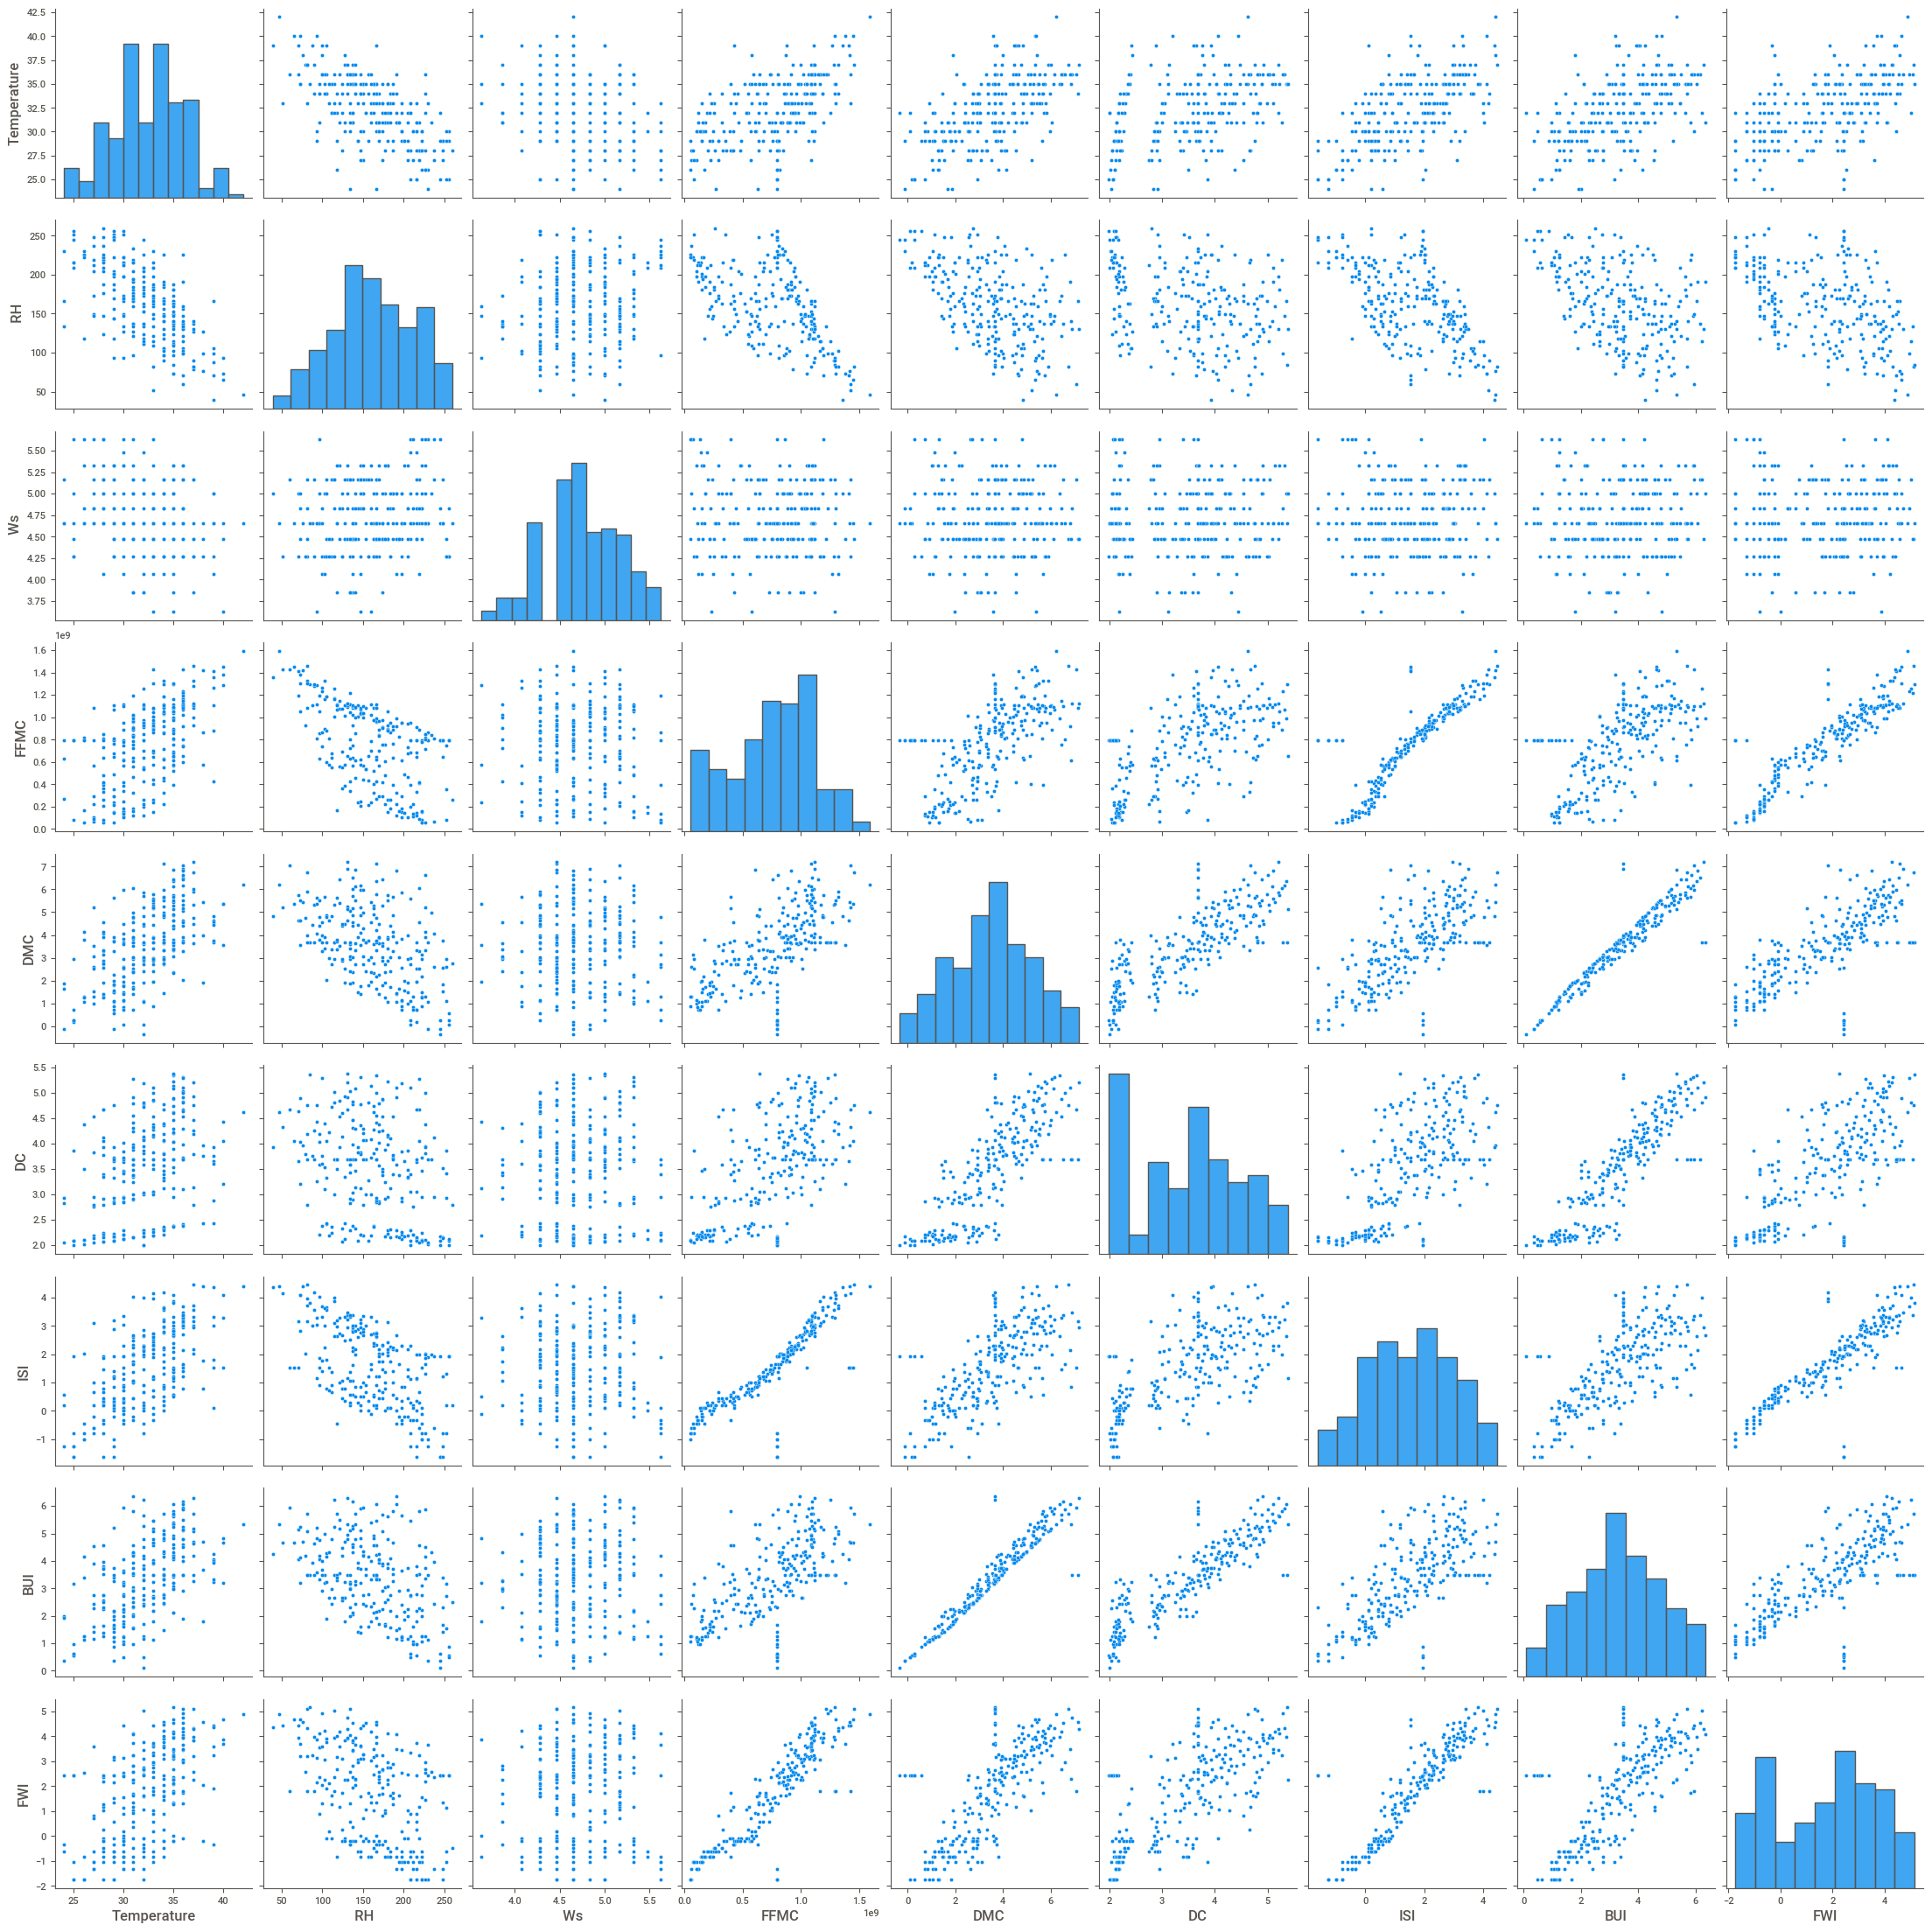

In [62]:
sns.pairplot(data)

# __Starting ML modeling with all transformetions__

## __Creating dummy for categorical data__

In [63]:
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.head()

,Temperature,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI,Rain _rain,Classes _not fire,region_Bejaia
0,29.0,143.372066,5.165577,2.397096e+08,1.500687,2.088219,0.273654,1.425881,-0.635298,0,1,1
1,29.0,156.584073,4.274100,2.169371e+08,1.787143,2.088219,0.000000,1.613893,-0.817037,1,1,1
2,26.0,229.913004,4.652957,7.938513e+08,1.066187,2.016165,-0.999762,1.123805,-1.741158,1,1,1
3,25.0,255.688760,4.274100,7.938513e+08,0.273793,1.985954,1.939132,0.566472,2.429965,1,1,1
4,27.0,211.889717,4.830483,2.237512e+08,1.318603,2.756670,0.187727,1.613893,-0.635298,0,1,1


In [64]:
y = data_dummy["Classes  _not fire"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes  _not fire, dtype: uint8

In [65]:
X = data_dummy.drop(["Classes  _not fire"],axis=1)
X.head()

,Temperature,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI,Rain _rain,region_Bejaia
0,29.0,143.372066,5.165577,2.397096e+08,1.500687,2.088219,0.273654,1.425881,-0.635298,0,1
1,29.0,156.584073,4.274100,2.169371e+08,1.787143,2.088219,0.000000,1.613893,-0.817037,1,1
2,26.0,229.913004,4.652957,7.938513e+08,1.066187,2.016165,-0.999762,1.123805,-1.741158,1,1
3,25.0,255.688760,4.274100,7.938513e+08,0.273793,1.985954,1.939132,0.566472,2.429965,1,1
4,27.0,211.889717,4.830483,2.237512e+08,1.318603,2.756670,0.187727,1.613893,-0.635298,0,1


## __Spliting all data in training and testing data__

In [66]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163, 11)
(81, 11)
(163,)
(81,)


## __Standardize the scalling of all data__

In [84]:
data.describe()

,Temperature,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.254098,161.523372,4.715794,7.657288e+08,3.520849,3.511171,1.545551,3.351128,1.714493
std,3.513786,49.228206,0.413556,3.613599e+08,1.691828,0.977107,1.430895,1.461055,1.916790
min,24.000000,38.860636,3.629415,5.317822e+07,-0.336911,1.985954,-1.631019,0.096426,-1.741158
25%,30.000000,127.237112,4.467800,5.287821e+08,2.365885,2.675595,0.432850,2.246782,-0.216908
50%,32.000000,163.286993,4.652957,7.986227e+08,3.678303,3.680945,1.539991,3.479520,2.064279
75%,35.000000,198.595767,5.001140,1.049498e+09,4.784115,4.238154,2.703364,4.486560,3.256517
max,42.000000,259.420891,5.626742,1.593463e+09,7.181914,5.381883,4.456251,6.356533,5.159718


In [85]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [87]:
log_reg.fit(X_train_std,y_train)

LogisticRegression()

In [88]:
y_predict = log_reg.predict(X_test_std)
y_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9753086419753086

In [90]:
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[45,  1],
       [ 1, 34]])

In [91]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [92]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9753086419753086

In [93]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9782608695652174

In [94]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9782608695652174

In [95]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9782608695652174

In [96]:
auc = roc_auc_score(y_test, y_predict)
auc

0.9748447204968944